## The MNIST Dataset

The MNIST dataset comprises 60,000 training images and 10,000 testing images of handwritten digits. These images are in grayscale and have a dimension of 28x28 pixels. In this section, our goal is to create a Feed Forward Neural Network that can effectively categorize these images into the digits 0 to 9.
![digit demo](digit_demo.png)

In this tutorial, our focus is on creating a feedforward neural network designed to categorize handwritten digits. These images of handwritten digits are part of a well-known dataset known as MNIST, which is highly renowned in the field.

Our approach involves flattening the images, essentially transforming them into a one-dimensional format. The number of input neurons in the neural network corresponds to the total number of pixels (28*28 = 784) in each image.

For the output layer of our neural network, we have ten neurons. This number aligns with the ten classes we aim to classify because we're dealing with digits ranging from 0 to 9. In essence, our network's purpose is to classify these ten different digits.


In [13]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable

We imported ***torchvision.datasets*** for:

### Accessing Standard Datasets:
***torchvision.datasets*** provides a collection of widely-used standard datasets for computer vision tasks. One of the most famous datasets is the MNIST dataset, which contains images of handwritten digits. Other datasets, like CIFAR-10, CIFAR-100, and ImageNet, are also available. This module makes it easy to access and load these datasets into your project without having to manually download and preprocess the data.

### Data Loading and Transformation:
The datasets module includes functions and classes to load and preprocess the data. It allows you to apply various transformations to the images, such as resizing, cropping, and data augmentation. This is crucial for preparing the data in a format that's suitable for training deep learning models.

In [14]:
input_size = 784      # Number of input neurons (image pixels)
hidden_size = 400     # Number of hidden neurons
out_size = 10         # Number of classes (0-9)
epochs = 10           # How many times we pass our entire dataset into our network
batch_size = 100      # Input size of the data during one iteration
learning_rate = 0.001 # How fast we are learning

In [15]:
train_dataset = datasets.MNIST(root='./',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)

test_dataset = datasets.MNIST(root='./',
                             train=False,
                             transform=transforms.ToTensor())

In [16]:
# make data iterable by loading it to a loader, shuffle the training data to make it independent of the order.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
# when we want to divide our input size into batches, then we need to use train loader

![digit neural network](digit_nn.png)

In [17]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)       # first layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)      # second layer
        self.fc3 = nn.Linear(hidden_size, out_size)         # third layer
        self.relu = nn.ReLU()                               # activation function

        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [18]:
# Create an object of the class, which represents our network
net = Net(input_size, hidden_size, out_size) 
CUDA = torch.cuda.is_available()
if CUDA:
    #if gpu is available, then switch the network to gpu to work faster
    net = net.cuda()
    
# the loss function. The Corss Entropy loss comes along with softmax. Therefore, no need to specify softmax as well
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [19]:
# let's see what are inside the net.parameters. 
net.parameters
# list(net.parameters())

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
  (relu): ReLU()
)>

In [20]:
# visualize the train loader
for i, (images, labels) in enumerate(train_loader):
    print(images.size()) 
    images = images.view(-1, 784) #reshaping the tensor
    print(images.size())

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

**torch.Size([100, 1, 28, 28])** ==>  100 corresponds to the batch size that we define earlier. So in each iterations, there's 100 images. 1 corresponnds to the number of channels in the image, since we have a grayscaled imaged(not coloured image), if the number of channels in the image is 3 then we have an RGB or colored image. 28 is the height or the number of rows, and the other 28 is the number of columns or the width of the image.

In [21]:
# Train the network
correct_train = 0                                # How many correct classifications our network classifies out of total_train samples
total_train = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100, 784) and wrap it in a variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        #switching between cpu and gpu
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        
        # clear the param_grad in param <-- param - lr*param_grad, so it won't accumulated
        optimizer.zero_grad() 
        
        outputs = net(images)                      # forward pass, 
        _, predicted = torch.max(outputs.data, 1)  # first argument returns the maximum score and second argument represents the index location of each maximum value found
        
        total_train += labels.size(0)              # labels.size(0) = 100 (batch_size)
        
        if CUDA:
            # if cuda is available, then all calculations are happening in gpu. so we need to
            # transfer these tensors to a cpu because sum() is a python function, there is
            # no implementation of sum() on a gpu
            correct_train += (predicted.cpu() == labels.cpu()).sum()
        else:
            # if we don't have cuda
            correct_train += (predicted == labels).sum()
            
        loss = criterion(outputs, labels)           # difference between the actual and predicted(loss function)
        loss.backward()                             # Backpropagation
        optimizer.step()                            # update the weights
        
        if (i+1) % 100 == 0:                        # printing the results
            print('Epoch [{}/{}], Iteration [{}/{}], Training Loss: {}, Training Accuracy: {}%'.format
                  (epoch+1, epochs, i+1, len(train_dataset)//batch_size, loss.item(), (100*correct_train/total_train)))
print("\n\nDONE TRAINING !!")        

Epoch [1/10], Iteration [100/600], Training Loss: 0.45170021057128906, Training Accuracy: 82.1500015258789%
Epoch [1/10], Iteration [200/600], Training Loss: 0.2693355083465576, Training Accuracy: 87.22000122070312%
Epoch [1/10], Iteration [300/600], Training Loss: 0.3223193287849426, Training Accuracy: 89.5433349609375%
Epoch [1/10], Iteration [400/600], Training Loss: 0.1313811093568802, Training Accuracy: 90.88999938964844%
Epoch [1/10], Iteration [500/600], Training Loss: 0.17995603382587433, Training Accuracy: 91.7760009765625%
Epoch [1/10], Iteration [600/600], Training Loss: 0.0823354423046112, Training Accuracy: 92.44000244140625%
Epoch [2/10], Iteration [100/600], Training Loss: 0.12789306044578552, Training Accuracy: 93.0442886352539%
Epoch [2/10], Iteration [200/600], Training Loss: 0.024114586412906647, Training Accuracy: 93.57499694824219%
Epoch [2/10], Iteration [300/600], Training Loss: 0.05626440420746803, Training Accuracy: 93.96221923828125%
Epoch [2/10], Iteration [4

correct_train --> ow many correct classifications our network classifies out of total_train samples. Through every iteration in the loop, the total_train will be incremented by the batch size(100)

There are 2 loops:
 - The outer loop iterates over epochs.
 - The inner loop iterates over batches of data. Within each epoch, the training dataset is divided into smaller batches, and the inner loop processes these batches one by one. **enumerate(train_loader)** is used to obtain batches of data from the **train_loader**. In each iteration of the inner loop, a batch of images and their corresponding labels are loaded and processed. The neural network is updated with each batch of data using backpropagation and gradient descent.

*labels* are 0 to 9

The purpose of using **Variable** was to enable automatic differentiation. By wrapping tensors with **Variable**, you signaled to PyTorch that you wanted to track operations on those tensors and compute gradients. This is important because gradients are necessary for updating model parameters during training with gradient-based optimization algorithms like stochastic gradient descent (SGD).

However, since PyTorch 0.4 and later versions, automatic differentiation is enabled by default on tensors, which means that you can perform operations on tensors directly, and PyTorch will automatically track those operations and compute gradients. In these newer versions, using Variable for most common use cases is no longer required, and you can work with tensors directly.

**outputs**, contains the network's predictions or output for the given input batch of images. After obtaining the network's output (**outputs**), we typically want to determine which class or category the network has predicted for each input and **torch.max(outputs.data, 1)** does that task.
**torch.max(outputs.data, 1)** finds the maximum value along dimension 1 (columns) of the outputs tensor. Maximum value basically indicates which label is classified or predicted by the network.

In [22]:
# Test the network (We need No loss and weight calculation, no weight update, 
# just forward propagation is needed)
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    
    if CUDA:
        images = images.cuda()
    # For each input (or, sample or, row) in the batch, the output will contain 10 elements
    outputs = net(images)
    # We could also write: predicted = outputs.data.max(1)[1]
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)         # Increment the total count(100)
    # We can also use: correct := predicted.eq(labels).sum()
    if CUDA:
        correct += (predicted.cpu() == labels.cpu()).sum()
    else:
        correct += (predicted == labels).sum()
        
print("Final Test Accuracy is : %d %%" % (100*correct/total))
    

Final Test Accuracy is : 98 %


In our project, our feedforward neural network has achieved an impressive 97% accuracy on the test dataset, indicating that it doesn't suffer from overfitting and can generalize well to new, unseen data. We plan to explore convolutional neural networks in the next section to investigate the potential for further improvement beyond this already high accuracy. While the current accuracy is commendable, there is still room for enhancement, and we intend to employ techniques like batch normalization and dropout in the upcoming section to potentially push the accuracy even higher. We anticipate that the application of these techniques within the context of convolutional networks will lead to an increase in our final test accuracy, further enhancing the performance of our model.

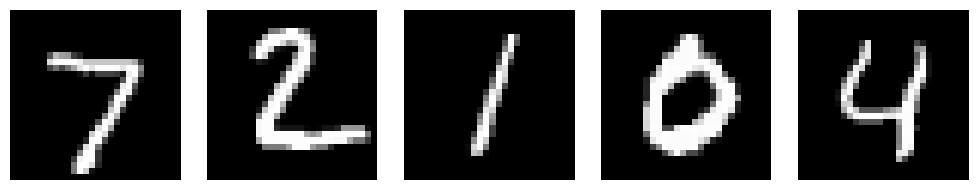

In [ ]:
# Use the “inline” backend so plots appear inside the notebook
%matplotlib inline

import matplotlib.pyplot as plt


test_images = test_dataset.data  # Testing images (28x28 grayscale)

#    Pre‐process the tensor for Matplotlib
#    a) .squeeze(1)    → remove the “channel” dimension (1)
#    b) .numpy()       → convert to NumPy array (dtype float32)
#    c) .astype(...)   → cast to float64 to avoid backend float32 bugs
imgs_np = test_images.squeeze(1).numpy().astype(np.float64)
# Now imgs_np has shape [100, 28, 28]

# Plot the first 5 images side by side
plt.figure(figsize=(10, 2))         # width=10", height=2" for readability
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)   # 1 row, 5 columns, current index
    ax.axis('off')                  # turn off ticks & axis labels
    ax.imshow(imgs_np[i], cmap='gray')  # display a 2D grayscale image

plt.tight_layout()  # adjust spacing so titles/axes don’t overlap
plt.show()


## Faulty Plotting Code

```python
%matplotlib inline
from matplotlib import pyplot as plt

for i in range(5):
    plt.subplot(1, 5, 1 + i)
    plt.axis('off')
    plt.imshow(test_images[i], cmap="gray")
plt.show() 
```

### Exact Error Message given by this code
The Kernel crashed while executing code in the current cell or a previous cell.
Please review the code in the cell(s) to identify a possible cause of the failure.
Click here for more info.
View Jupyter log for further details. 


## Why This Fails

- **Direct PyTorch tensor** → imshow
    test_images[i] is a PyTorch FloatTensor (dtype float32). Passing it straight into Matplotlib’s Agg (PNG) renderer triggers a low-level segmentation fault in the C/C++ backend, causing a hard kernel crash rather than a Python exception.

- **Missing conversion to CPU & NumPy**
    Matplotlib expects a CPU‐resident NumPy array. You must first do:

```python
        img = test_images[i].cpu().detach().squeeze().numpy()
```
to convert from a GPU or graph‐connected tensor into a plain NumPy array.

- **Float32 rendering bug**
Many Matplotlib/Pillow versions have a known bug when rendering float32 arrays. Even after conversion, you often need to cast to float64 or use an SVG backend to avoid crashes:
```python
        img = img.astype('float64')
```
By skipping these conversion steps and casting, the backend receives data it can’t handle safely and the kernel crashes.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

test_targets = test_dataset.targets # extracting the true labels of the images.

# Loop through the first 5 images in the test dataset
for i in range(5):
    # Move the image to the device (GPU or CPU) specified by the 'device' variable
    image = test_images[i].to(device)

    # Scale the image data to the range [0, 1] by dividing by 255, and convert to float type
    image = image.float() / 255

    # Flatten the image from a 28x28 2D tensor to a 1D vector of size 784 (28*28)
    image = image.view(28 * 28)

    # Print the true label of the image (from test_targets)
    print("The target label is", test_targets[i].item())

    # Use the model to make a prediction. The output is a vector of class scores.
    # We take the index of the highest score (argmax) as the predicted label.
    # Use `.item()` to get the scalar value from the tensor for printing.
    print("The predicted label is", net(image).argmax().item())


The target label is 7
The predicted label is 7
The target label is 2
The predicted label is 2
The target label is 1
The predicted label is 1
The target label is 0
The predicted label is 0
The target label is 4
The predicted label is 4


In [26]:
! pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

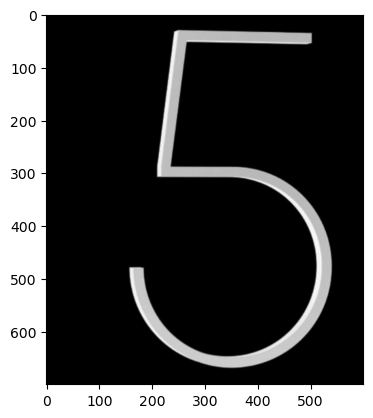

In [ ]:
# Read the image file 'number_5.jpg' from disk in single‐channel (grayscale) mode
img_gray = cv2.imread('number_5.jpg', cv2.IMREAD_GRAYSCALE)


# Crop the image if needed (Zoom in to the region with the number)
cropped = img_gray[250:950, 250:850]

# Invert the image to match the MNIST dataset style (black on white)
inverted = 255 - cropped


plt.imshow(inverted, cmap="gray")

plt.show()

In [42]:
# Classify the image

# Resize the image to 28x28 to match MNIST input size
image = cv2.resize(inverted, (28, 28))

# Flatten the image into a 1D tensor (28*28 = 784)
image = torch.tensor(image).to(device)  # Move the image to the correct device (GPU/CPU)

# Normalize the image to range [0, 1] as done with MNIST images
image = image.float()/255    # Scale the data
image = image.view(28*28) # Flatten the image


# Make the prediction using the trained model
with torch.no_grad():  # Disable gradient calculation during inference
    net.eval()  # Set the model to evaluation mode
    predictions = net(image)  # Get the model's prediction
    predicted_label = predictions.argmax(dim=-1).item()  # Get the predicted class

print("The predicted label is", predicted_label)

The predicted label is 5
